#### **Name: Angad Gupta**
#### **Enroll No: 21SOECE11614**
#### **Roll No: 14**

# **Creating a neural network using TensorFlow for binary classification**


Here are the steps to build a neural network for binary classification using TensorFlow, with predictions and model visualization:

1. **Check TensorFlow version:**

2. **Import necessary libraries:**

3. **Load the dataset:**

4. **Filter the dataset for binary classification:**

5. **Split the dataset:**

6. **Standardize the features:**
  
7. **Build the neural network model:**
   
8. **Compile the model:**
  
9. **Train the model:**

10. **Evaluate the model:**
  
11. **Make predictions on test data:**

12. **Visualize and Display the model architecture:**

### 1. **Check TensorFlow version:**


In [1]:
# Importing necessary libraries
import tensorflow as tf

# Checking TensorFlow version to ensure compatibility
print(tf.__version__)

2.17.0


### 2. **Import necessary libraries:**


In [3]:
# Sequential model for building the neural network
from tensorflow.keras.models import Sequential

# Dense layer for creating fully connected layers
from tensorflow.keras.layers import Dense

# Importing Iris dataset for binary classification task
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 3. **Load the dataset:**


In [4]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix (4 features)
y = iris.target  # Target vector (3 classes)

In [5]:
# Displaying the target values to understand the structure
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 4. **Filter the dataset for binary classification:**


In [6]:
# Creating a binary classification problem by removing one class (class '2')
binary_indices = y != 2  # Boolean mask to filter out class '2'
X = X[binary_indices]  # Keeping only classes '0' and '1'
y = y[binary_indices]  # Keeping only corresponding target values for classes '0' and '1'

In [7]:
# Printing the new binary target values (0 and 1)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
# Checking the length of the data to ensure proper filtering
print(len(X))
print(len(y))

100
100


### 5. **Split the dataset:**
   - Use `train_test_split()` from `sklearn.model_selection` to divide the data into training and testing sets (80% training, 20% testing).

In [9]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
# random_state ensures reproducibility, test_size=0.2 means 20% for testing



### 6. **Standardize the features:**
   - Use `StandardScaler` to standardize both the training and testing data, ensuring that all features have zero mean and unit variance.

In [ ]:
# Standardizing the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 7. **Build the neural network model:**
   - Add three layers:
     - Input layer with 32 neurons and ReLU activation.
     - Hidden layer with 16 neurons and ReLU activation.
     - Output layer with 1 neuron and sigmoid activation for binary classification.

In [10]:
# Building the Neural Network Model
model = Sequential([  # Sequential API allows stacking layers in sequence
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),  # Input layer with 32 neurons and ReLU activation
    Dense(16, activation="relu"),  # Hidden layer with 16 neurons and ReLU activation
    Dense(1, activation="sigmoid")  # Output layer with 1 neuron and sigmoid activation for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. **Compile the model:**


In [11]:
# Compiling the model with Adam optimizer and binary crossentropy loss for binary classification
model.compile(
    optimizer="adam",  # Adam optimizer (adaptive learning rate)
    loss="binary_crossentropy",  # Binary crossentropy loss function for binary classification
    metrics=["accuracy"]  # Monitoring accuracy during training
)


### 9. **Train the model:**


In [12]:
# Training the model on the training data with 50 epochs and a batch size of 32
model.fit(
    X_train, y_train,  # Training data
    epochs=50,  # Number of epochs (how many times the model will see the entire dataset)
    batch_size=32,  # Number of samples per gradient update
    validation_split=0.2  # Use 20% of training data as validation set
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.5417 - loss: 0.6474 - val_accuracy: 0.8125 - val_loss: 0.5591
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6250 - loss: 0.6168 - val_accuracy: 0.8125 - val_loss: 0.5373
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.5935 - val_accuracy: 0.8750 - val_loss: 0.5168
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8646 - loss: 0.5767 - val_accuracy: 0.9375 - val_loss: 0.4976
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9375 - loss: 0.5529 - val_accuracy: 0.9375 - val_loss: 0.4795
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 0.5351 - val_accuracy: 1.0000 - val_loss: 0.4620
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9688 - loss: 0.5120 - val_accuracy: 1.0000 - val_loss: 0.4453
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9792 - loss: 0.5047 - val_accuracy: 1.0000 - val_loss: 0.4295

### 10. **Evaluate the model:**


In [14]:
# Evaluating the model's performance on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')  # Printing the test accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0717
Test Accuracy: 1.0000


### 11. **Make predictions on test data:**


In [15]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Since this is binary classification, the predictions are probabilities
# Convert probabilities to class labels using a threshold of 0.5
predicted_classes = (predictions > 0.5).astype(int).flatten()

# The true classes are already binary (0 or 1)
true_classes = y_test

# Print the first 10 predictions and their true labels
print(f"Predicted classes: {predicted_classes[:10]}")
print(f"True classes: {true_classes[:10]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted classes: [1 1 1 0 0 0 0 1 0 0]
True classes: [1 1 1 0 0 0 0 1 0 0]


### 12. **Visualize and Display the model architecture:**

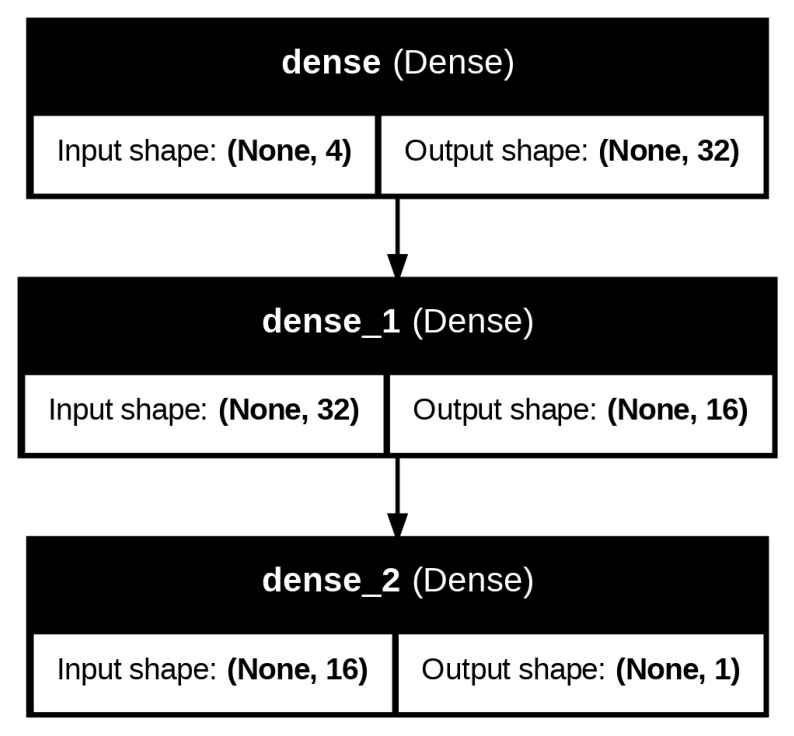

In [16]:
import matplotlib.pyplot as plt
from PIL import Image  # For loading and displaying images
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

# Display the model plot
img = Image.open("model_plot.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")  # Hide the axis
plt.show()

## **Question and answer**
**1. Epochs**

An epoch in machine learning refers to one complete pass through the entire training dataset. During an epoch, the model processes every training example once and updates its parameters based on the patterns it learns. Multiple epochs are typically used to improve the model’s performance by allowing it to learn more complex patterns in the data12.

**2. Batch Size**

The batch size is the number of training examples used in one iteration before updating the model’s parameters. Instead of processing the entire dataset at once, the data is divided into smaller batches. This helps in efficient memory usage and faster training. For example, if you have 1000 training samples and a batch size of 100, the model will process 100 samples at a time, updating its parameters after each batch34.

**3. Validation Split**

The validation split is a fraction of the training data set aside to evaluate the model’s performance during training. This helps in tuning the model’s hyperparameters and preventing overfitting. For instance, if you set validation_split=0.2, 20% of the training data will be used for validation, and the remaining 80% will be used for training

**What is Adam?**

Adam (short for Adaptive Moment Estimation) is an optimization algorithm used to update network weights iteratively based on training data. It combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. Adam is known for its efficiency and low memory requirements, making it well-suited for problems with large datasets or parameters12.

**What is Binary Cross-Entropy?**

Binary Cross-Entropy (also known as log loss) is a loss function used in binary classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1. The goal is to minimize this loss function during training to improve the model’s predictive accuracy. It is not used iin linear regression.

### **Other Possibilities for Optimizer and Loss**

**Optimizers:**

**Stochastic Gradient Descent (SGD):** Updates parameters using the gradient of the loss function.

**RMSProp:** Adapts the learning rate for each parameter by dividing the gradient by a running average of its recent magnitude.

**AdaGrad:** Adapts the learning rate for each parameter based on the historical gradients.

**Nesterov Accelerated Gradient (NAG):** A variant of SGD that looks ahead to where the parameters will be.

**Nadam:** Combines Adam and NAG for better performance.

### **Loss Functions:**

**Mean Squared Error (MSE):** Used for regression tasks, measuring the average squared difference between predicted and actual values.

**Categorical Cross-Entropy:** Used for multi-class classification problems.

**Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values.

**Hinge Loss:** Used for training classifiers, particularly in support vector machines.

**Huber Loss:** Combines MSE and MAE, used for regression tasks to handle outliers better.

- **Note:-** Choosing the right optimizer and loss function depends on the specific problem and dataset you are working with56.